In [237]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\GEO COMPUTER S\\AtomCamp Assignments\\EDA Portfolio Project\\Amazon_Clothing_Sales_2025.csv")

# A. Initial Data Exploration & Cleaning

# A-1 Checking Schema

In [238]:
#First of all, lets see what kind of data we have and see the coloumns.

df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


In [239]:
# Now, lets check the datatype of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000 non-null  int64  
 16  regi

In [240]:
# As the Data Type of the order_date, change it to Date Time.

df["order_date"] = pd.to_datetime(df["order_date"])
print(df["order_date"].dtype)

datetime64[ns]


# A-2 Handling Missng Values

In [241]:
# First, find out the count and percentage of missng values in each column.

df.isnull().sum()

order_id                 0
customer_id              0
product_id               0
product_name             0
main_category            0
sub_category             0
brand                 1250
price                  250
quantity                 0
discount_percent         0
final_price              0
payment_method        1250
review_rating            0
order_date               0
delivery_days          250
is_returned              0
region                1250
customer_age_group    1250
device_type           1250
dtype: int64

In [242]:
# Now find percentage of missig values conpared to original values

df.isnull().mean()*100

order_id              0.0
customer_id           0.0
product_id            0.0
product_name          0.0
main_category         0.0
sub_category          0.0
brand                 5.0
price                 1.0
quantity              0.0
discount_percent      0.0
final_price           0.0
payment_method        5.0
review_rating         0.0
order_date            0.0
delivery_days         1.0
is_returned           0.0
region                5.0
customer_age_group    5.0
device_type           5.0
dtype: float64

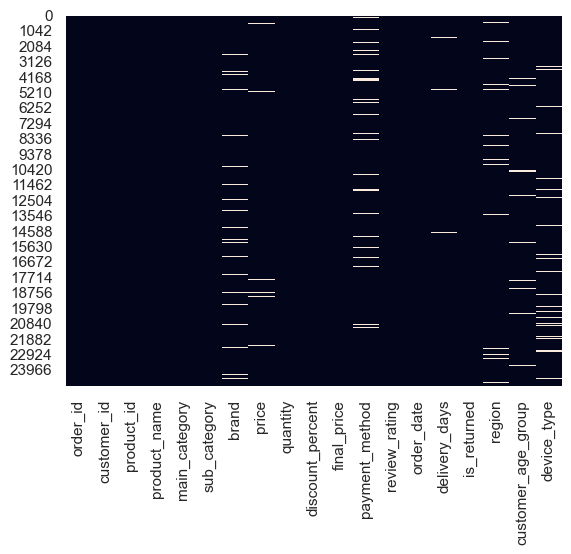

In [243]:
# Lets check if data is missing at complete random or a consective series of data is missing

sb.heatmap(df.isnull(), cbar = False)
plt.show()

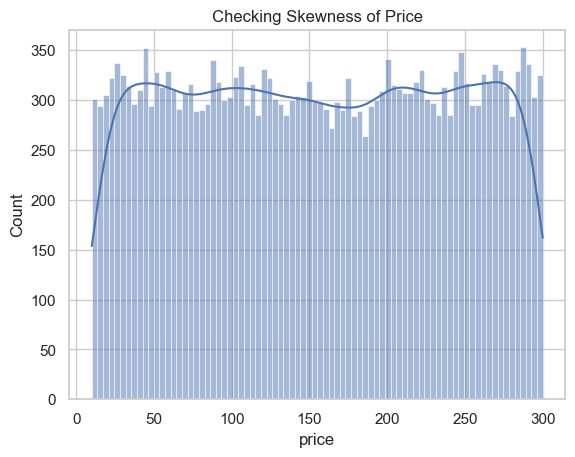

In [244]:
# Thus data is missing at random, not a consective data is missing. I will do imputation of the Data.
# Now, first check the skewness of each missing values column
# Checking if price is skewed or not

sb.histplot(df["price"], kde = True, bins = 80)
plt.title("Checking Skewness of Price")
plt.show()

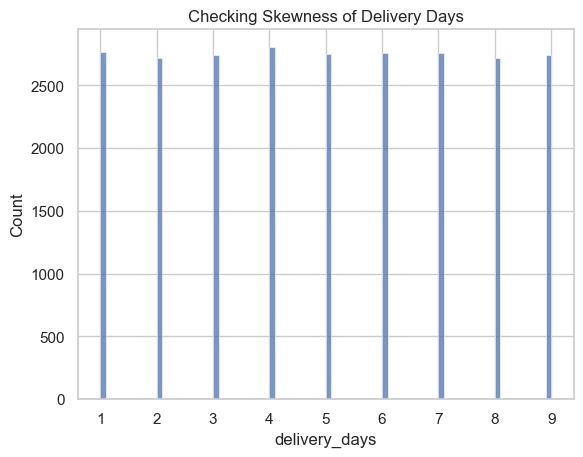

In [245]:
# Checking if Delivery Days are skewed or not

sb.histplot(df["delivery_days"], bins = 80)
plt.title("Checking Skewness of Delivery Days")
plt.show()

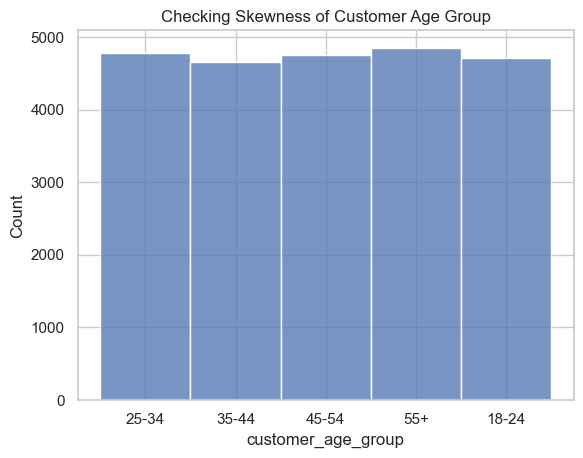

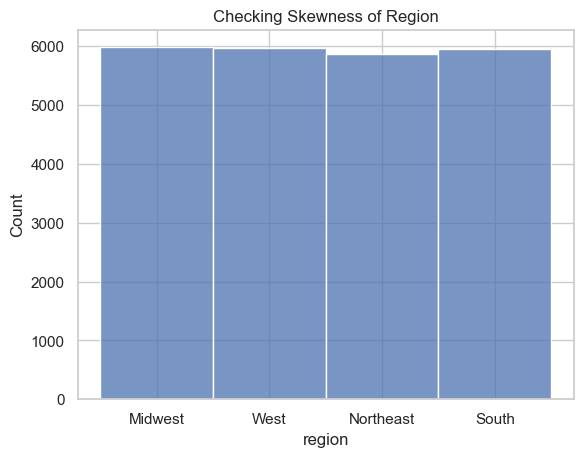

In [246]:
# Checking if Customer Age Group and Region are skewed or not

sb.histplot(df["customer_age_group"], bins = 20)
plt.title("Checking Skewness of Customer Age Group")
plt.show()

sb.histplot(df["region"], bins = 20)
plt.title("Checking Skewness of Region")
plt.show()

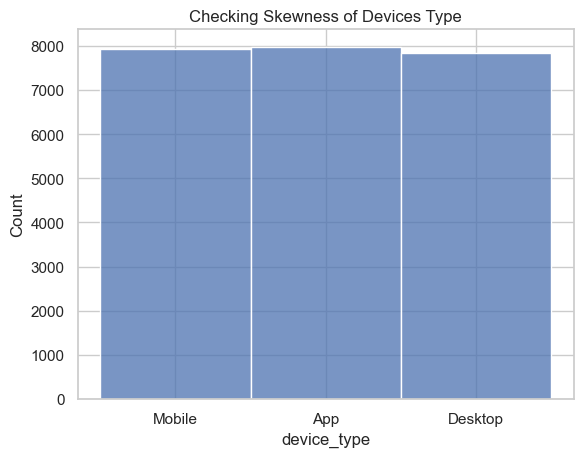

In [247]:
# Checking if Devices Type skewed or not

sb.histplot(df["device_type"], bins = 20)
plt.title("Checking Skewness of Devices Type")
plt.show()

In [248]:
# Conclusion: No data is skewed. So, we will replace numerical values with the mean and categorical values with the mode as missing values % 
# is very small 5% and it will not cause any bais.

missing_cols = df.columns[df.isnull().any()]

num_cols = df[missing_cols].select_dtypes(include = [np.number]).columns
cat_cols = df[missing_cols].select_dtypes(exclude = [np.number]).columns

for col in num_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace = True)

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace = True)

df.isnull().sum()

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\1802506801.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace = True)
C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\1802506801.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

order_id              0
customer_id           0
product_id            0
product_name          0
main_category         0
sub_category          0
brand                 0
price                 0
quantity              0
discount_percent      0
final_price           0
payment_method        0
review_rating         0
order_date            0
delivery_days         0
is_returned           0
region                0
customer_age_group    0
device_type           0
dtype: int64

# A-3 Duplicates & Integrity:

In [249]:
#Lets check out the number of duplicate rows and then removing them.

df.duplicated().sum()

0

In [250]:
# So, there are no duplicate rows in the data. Now, lets move towards data integrity.
# I observed that same order IDs have different products. It can be due to that one order my include multiple products.

# Now, lets check data integrity of the price, discount price, and final price.

df["expected_final"] = (df["quantity"] * (df["price"] * (1 - (df["discount_percent"]/100)))).round(2)

df["integrity_issue"] = df["expected_final"] != df["final_price"]
display(df["integrity_issue"])

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Name: integrity_issue, Length: 25000, dtype: bool

In [251]:
print(df["integrity_issue"].value_counts())

integrity_issue
False    24698
True       302
Name: count, dtype: int64


In [252]:
# There is data integrity issue in the 302 rows. I happended because when I was dealing with the msiing values, I added mean in
# missing prices boxes. Almost, 250 rows prices are replaced by me and 52 rows prices already have issues. Let, me correct this.

df.loc[df["integrity_issue"], "price"] = (
    df["final_price"] / (df["quantity"] * (1 - (df["discount_percent"] / 100)))
)

df["price"] = df["price"].round(2)

In [253]:
# Now, lets check again data integrity (As there is minor rounding issue, we will set tolerance/diff/atol 0.05):

df["expected_final"] = (df["quantity"] * (df["price"] * (1 - (df["discount_percent"]/100)))).round(2)

df["integrity_issue"] = ~np.isclose(df["expected_final"], df["final_price"], atol= 0.05)
print(df["integrity_issue"].value_counts())

integrity_issue
False    25000
Name: count, dtype: int64


# A-4 Outliers

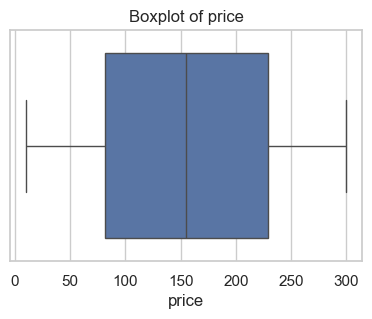

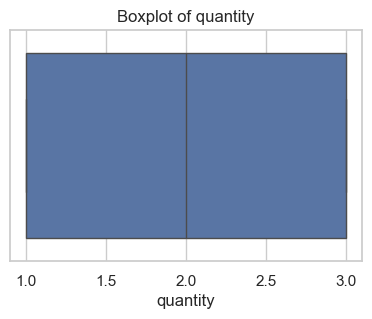

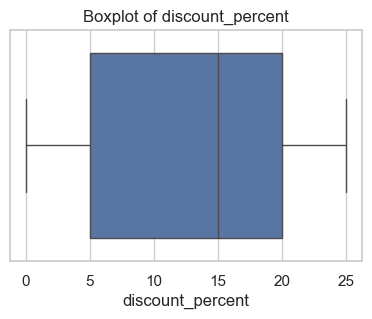

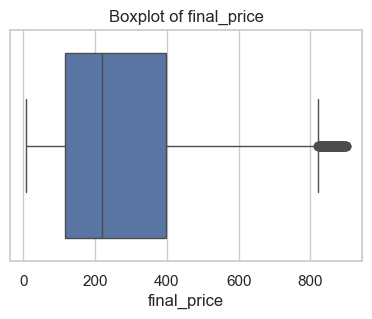

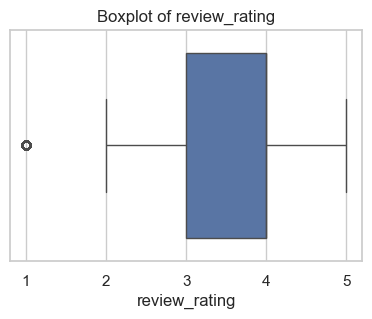

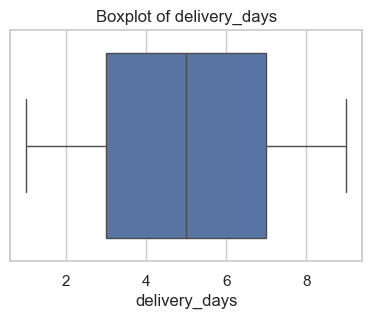

In [254]:
numeric_cols = ["price", "quantity", "discount_percent", "final_price", "review_rating", "delivery_days"]

for col in numeric_cols:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1, 2, 1)
    sb.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

In [255]:
#This indicates that there are no specific outliers that may cause bais/error.

# A-5 Feature Engineering:

In [256]:
print(df["order_date"].dtype)

datetime64[ns]


In [257]:
# Lets make columns for the order Week Day, Month and Year.

df["order_month"] = df["order_date"].dt.month
df["order_year"] = df["order_date"].dt.year
df["order_weekday"] = df["order_date"].dt.weekday

In [258]:
# Now, lets make discount amount column

df["discount_amount"] = df["price"] * (df["discount_percent"]/100)

In [259]:
# Lets, make unit price column

df["unit_price"] = df["final_price"] / df["quantity"]

In [260]:
# Make delivery_falg column: If delivery is within 3 days, it will be marked as fast delivery, otherwise it will be marked as slow deilvery.

df["delivery_flag"] = df["delivery_days"].apply(lambda x: "Fast" if x <= 3 else "Slow")

In [261]:
# Now, I am going to make Customer-level aggregates: total spend, total orders, average rating given, return rate.

df_customer = df.groupby("customer_id").agg(
    total_spend = ("final_price", "sum"),
    total_orders = ("order_id", "count"),
    average_rating_given = ("review_rating", "mean"),
    return_rate = ("is_returned", "mean")
).reset_index()

df = df.merge(df_customer, on='customer_id', how='left')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              25000 non-null  object        
 1   customer_id           25000 non-null  object        
 2   product_id            25000 non-null  object        
 3   product_name          25000 non-null  object        
 4   main_category         25000 non-null  object        
 5   sub_category          25000 non-null  object        
 6   brand                 25000 non-null  object        
 7   price                 25000 non-null  float64       
 8   quantity              25000 non-null  int64         
 9   discount_percent      25000 non-null  int64         
 10  final_price           25000 non-null  float64       
 11  payment_method        25000 non-null  object        
 12  review_rating         25000 non-null  int64         
 13  order_date      

# B. Univariate Analysis

# B-1 Prices univariate analysis

In [263]:
#First of all lets do univariate analysis of the distribution of price, final_price, discount_percent, review_rating, delivery_days.

df[["price", "final_price", "discount_percent", "review_rating", "delivery_days"]].describe()

,price,final_price,discount_percent,review_rating,delivery_days
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,155.312451,271.491812,12.527400,3.698040,4.994869
std,84.407611,196.188476,8.543663,1.095641,2.565314
min,10.020000,7.530000,0.000000,1.000000,1.000000
25%,81.917500,116.247500,5.000000,3.000000,3.000000
50%,154.695000,219.410000,15.000000,4.000000,5.000000
75%,228.852500,398.565000,20.000000,4.000000,7.000000
max,299.980000,899.790000,25.000000,5.000000,9.000000


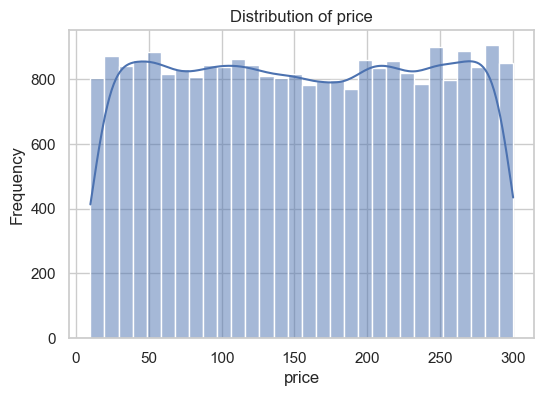

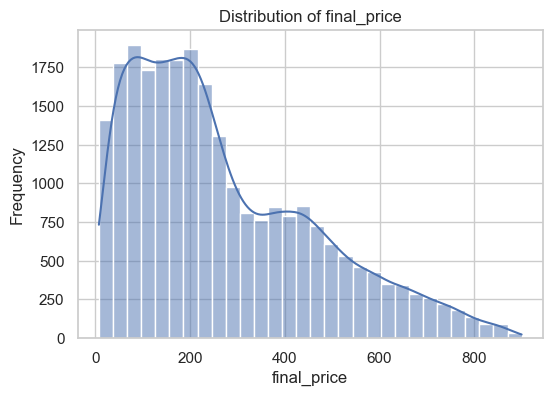

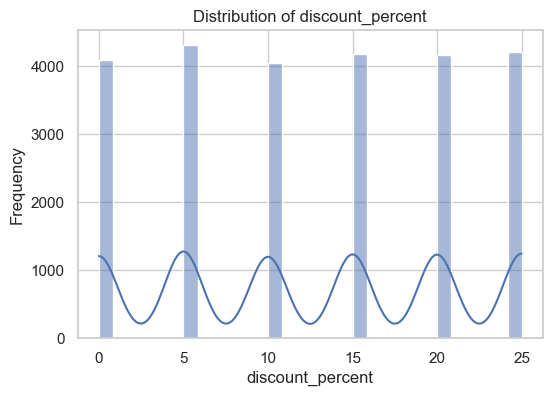

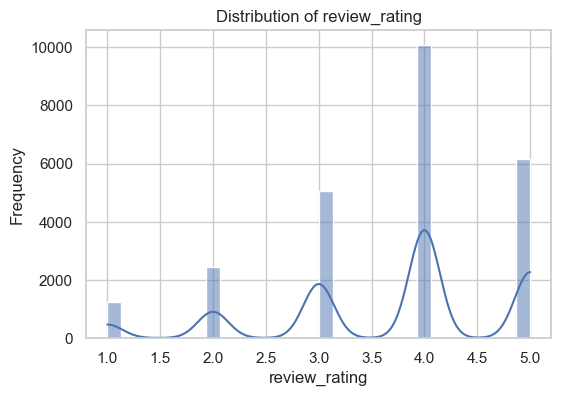

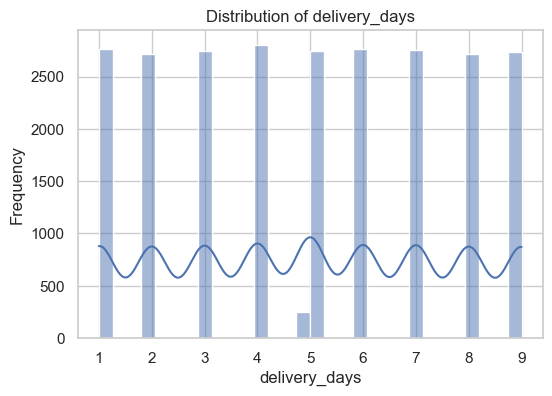

In [264]:
# This indicates that average time that it takes for the delivery of a order is 5 days. And average rating by cudotmers is 3.7.
# More, data can be seen in the above table. Lets, analyze it through charts:

columns = ['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']

for col in columns:
    plt.figure(figsize = (6, 4))
    sb.histplot(df[col], kde = True, bins = 30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# B-2 Univariate Analysis of categories

In [265]:
# Now, we are going to analyze the count of main_category, sub_category, brand, payment_method, region, customer_age_group, device_type.

columns = ["main_category", "sub_category", "brand", "payment_method", 
           "region", "customer_age_group", "device_type"]

for col in columns:
    print(f"Categories count of {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Categories count of main_category:
main_category
Kids     5726
Men      5617
Baby     5604
Women    5595
men       653
women     626
kids      590
baby      589
Name: count, dtype: int64
----------------------------------------
Categories count of sub_category:
sub_category
Shorts      1285
Tops        1269
Shirts      1256
Hats        1254
Caps        1246
Sandals     1237
Handbags    1235
T-Shirts    1211
Jewelry     1151
Watches     1145
Shoes       1140
Jeans       1137
Sweaters    1137
Booties     1134
Blankets    1134
Jackets     1130
Sneakers    1127
Rompers     1126
Dresses     1094
Onesies     1067
Watch3s      144
Sn3ak3rs     142
Sho3s        136
On3si3s      129
Sw3at3rs     123
Romp3rs      120
Blank3ts     118
J3w3lry      118
Dr3ss3s      117
J3ans        114
Jack3ts      113
Booti3s      111
Name: count, dtype: int64
----------------------------------------
Categories count of brand:
brand
Nike               3698
Adidas             2378
Carter's           2369
Gap      

In [266]:
# This indicate what majority of customers buy, who are our majoority cusotmers, what is their age group, what is their mode
# of payment.

# B-3 Orders Returned/not returned proportion

In [267]:
df["is_returned"].value_counts(normalize = True) * 100

is_returned
0    90.156
1     9.844
Name: proportion, dtype: float64

In [268]:
# This indicates that out of each 100 orders, 9 orders are returned.

# C. Bivariate & Multivariate Analysis

# C-1 Sales Perfomance Analysis

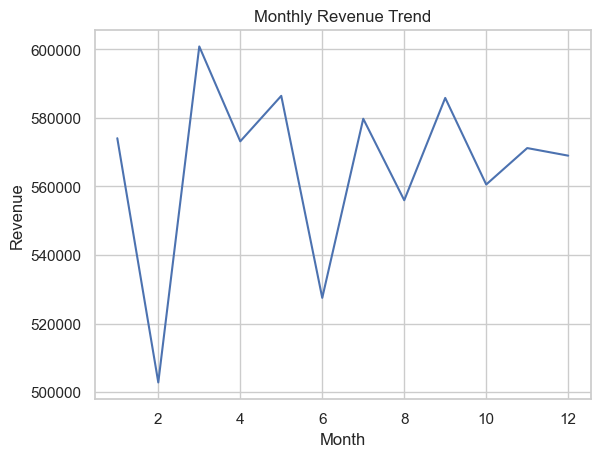

In [269]:
# First, lets analyze the revenue trends over the monthly basis.

monthly_revenue = df.groupby("order_month")["final_price"].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [270]:
#Thus, lowest sales occur in Feb and highest in next month (march)

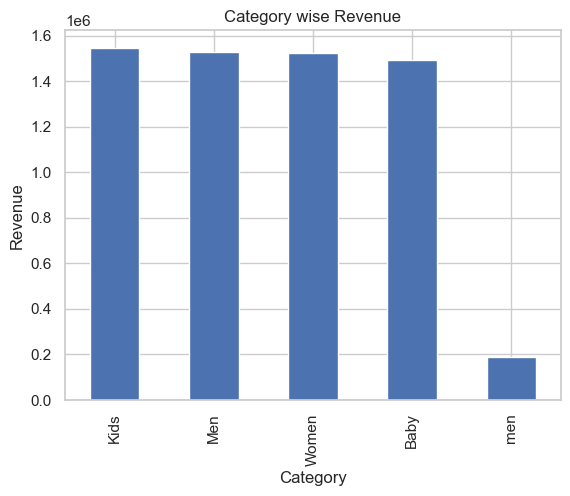

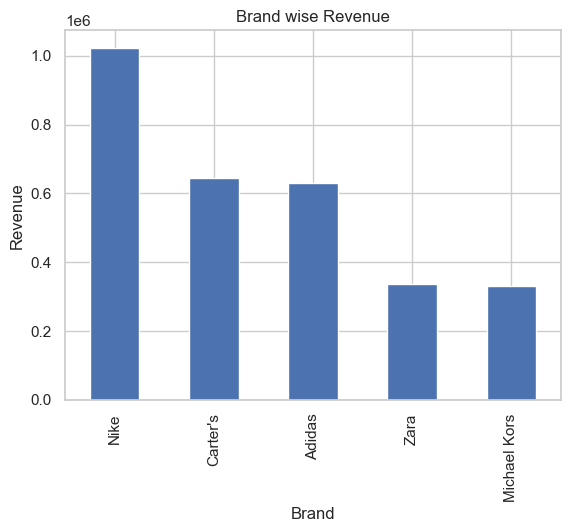

In [271]:
# Now, lets analyze which brand and category drives the most revenue.

category_revenue = df.groupby("main_category")["final_price"].sum().sort_values(ascending=False)
brand_revenue = df.groupby("brand")["final_price"].sum().sort_values(ascending = False)

category_revenue.head(5).plot(kind="bar", title="Category wise Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

brand_revenue.head(5).plot(kind="bar", title="Brand wise Revenue")
plt.xlabel("Brand")
plt.ylabel("Revenue")
plt.show()

In [272]:
# Thus, in categories kids and in brands Nike brings the most revenue.

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\2819683902.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_qty_per_bin = df.groupby('price_bin')['quantity'].mean()


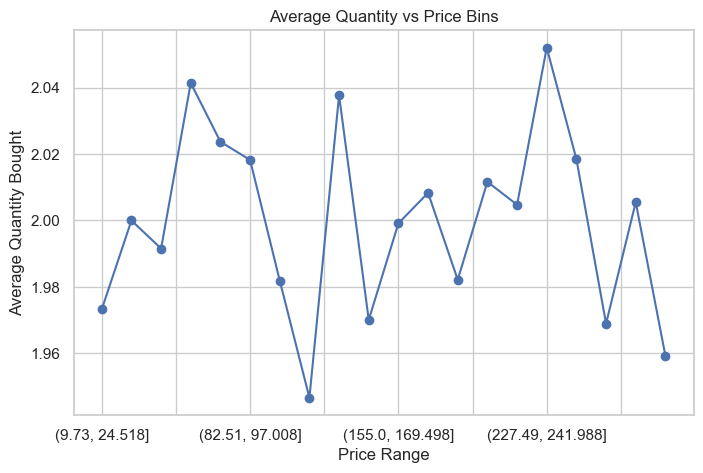

In [273]:
# Now, lets see does Prices impact the quantity of things bought.

df["price_bin"] = pd.cut(df["price"], bins = 20)

avg_qty_per_bin = df.groupby('price_bin')['quantity'].mean()

avg_qty_per_bin.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Average Quantity vs Price Bins")
plt.xlabel("Price Range")
plt.ylabel("Average Quantity Bought")
plt.grid(True)
plt.show()

In [274]:
# There is no significant impact of price increase with decrease of quantity.

# C-2. Discount Effectiveness:

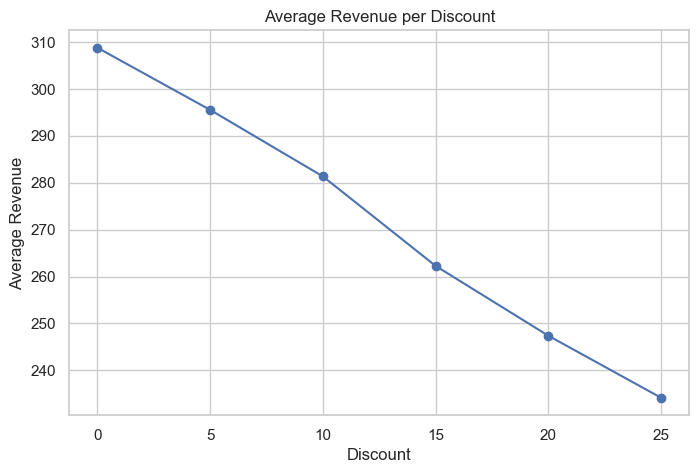

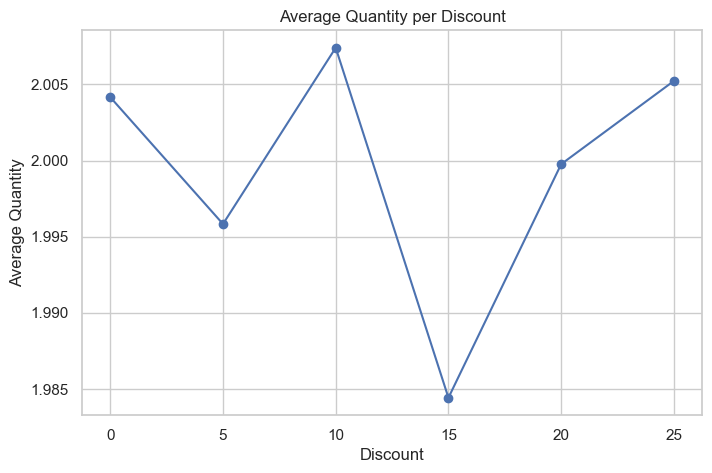

In [275]:
# Lets analyze discount impact on the revenue and quantity bought, by comparing average revenue and quantity at different discounts.

revenue_per_discount = df.groupby("discount_percent")["final_price"].mean()
quantity_per_discount = df.groupby("discount_percent")["quantity"].mean()

revenue_per_discount.plot(kind = "line", marker = "o", figsize = (8, 5))
plt.title("Average Revenue per Discount")
plt.xlabel("Discount")
plt.ylabel("Average Revenue")
plt.grid(True)
plt.show()

quantity_per_discount.plot(kind = "line", marker = "o", figsize = (8, 5))
plt.title("Average Quantity per Discount")
plt.xlabel("Discount")
plt.ylabel("Average Quantity")
plt.grid(True)
plt.show()

In [276]:
# Suprisingly, with the increase in the discount average revenue is decreasing. It is because, when you are going to give higher
# discounts to the customers, then it will decrease you net profit. Also, 15% Discount have least quantity sales and 25% discount
# has highest quantity sales

# C-3 Return Analysis

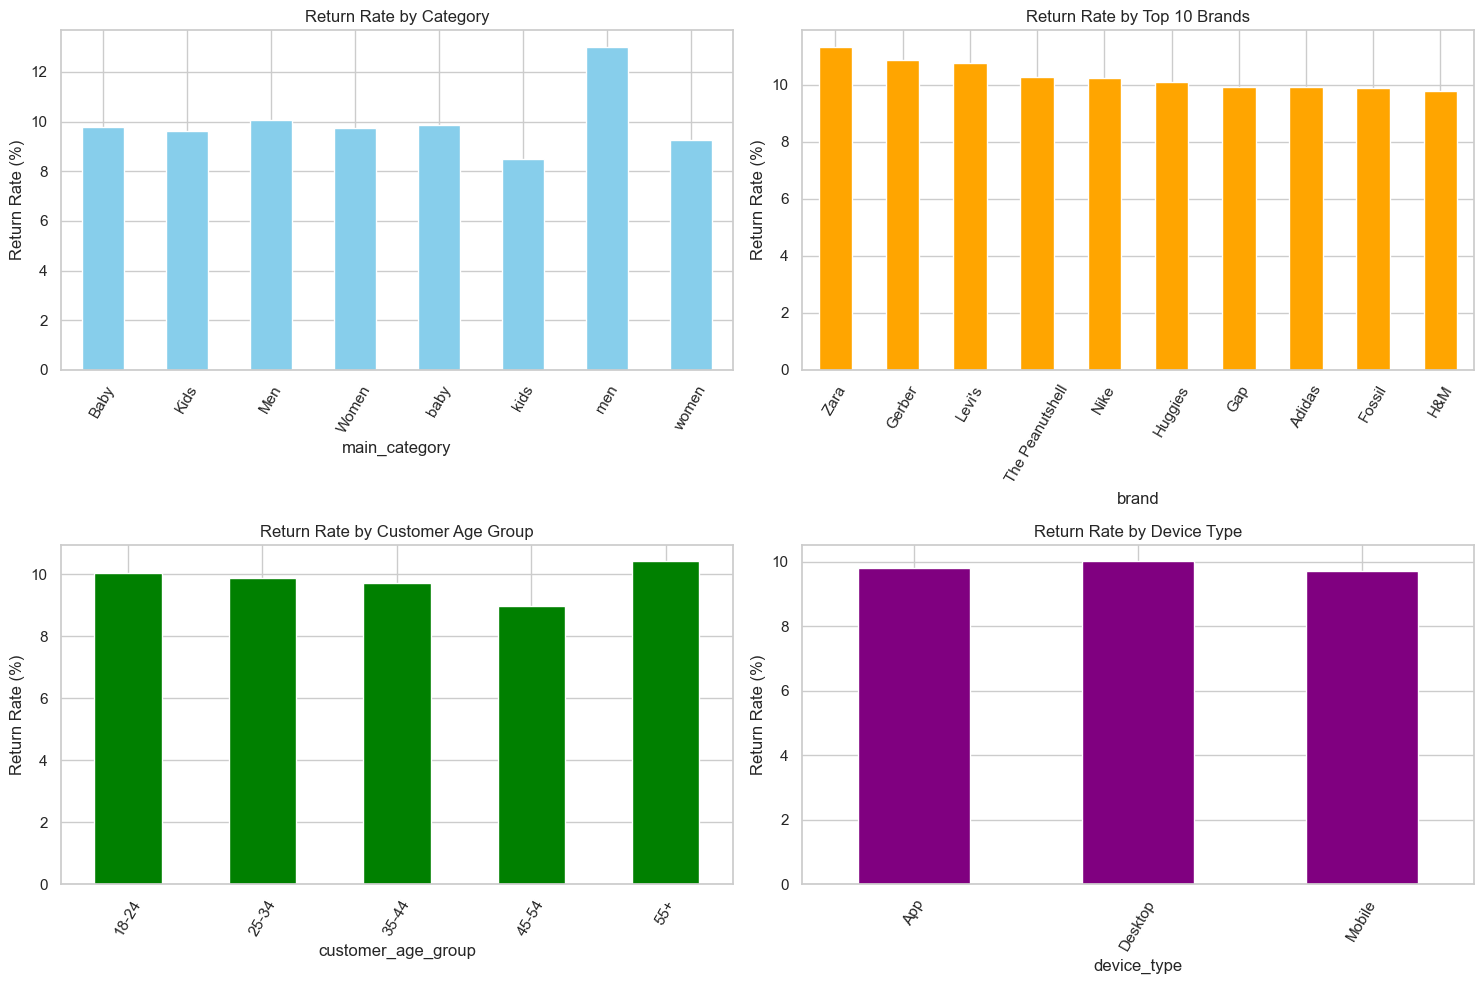

In [277]:
# Firstly, I am going to calculate the is_returned ratio with respect to different categorical data.
return_by_category = df.groupby("main_category")["is_returned"].mean() * 100
return_by_brand = df.groupby("brand")["is_returned"].mean() * 100
return_by_age = df.groupby("customer_age_group")["is_returned"].mean() * 100
return_by_device = df.groupby("device_type")["is_returned"].mean() * 100

# Now, I am going to create subplot, mean dividing grid into 2 by 2 partition so that it can have 4 graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Return rate by Category
return_by_category.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Return Rate by Category")
axes[0,0].set_ylabel("Return Rate (%)")
axes[0,0].tick_params(axis='x', rotation=60)

# Plot 2: Return rate by Brand (top 10 for clarity if many brands)
return_by_brand.sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title("Return Rate by Top 10 Brands")
axes[0,1].set_ylabel("Return Rate (%)")
axes[0,1].tick_params(axis='x', rotation=60)

# Plot 3: Return rate by Age Group
return_by_age.plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title("Return Rate by Customer Age Group")
axes[1,0].set_ylabel("Return Rate (%)")
axes[1,0].tick_params(axis='x', rotation=60)

# Plot 4: Return rate by Device Type
return_by_device.plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title("Return Rate by Device Type")
axes[1,1].set_ylabel("Return Rate (%)")
axes[1,1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()


In [278]:
# Thus, Zara brand has a little bit higher return rate as compared to the other brand and we can to know that men have the 
# highest return rates.

# C-4 Customer Behaviour

In [279]:
# Now, lets categorize the customers as High Value Customers based on either they have done one order only or multiple orders

customer_segments = df.groupby("customer_id").agg(
    total_orders=("order_id", "nunique")
).reset_index()

customer_segments["segment"] = customer_segments["total_orders"].apply(
    lambda x: "One-time Buyer" if x == 1 else "High-value Customer"
)

df = df.merge(customer_segments[["customer_id", "segment"]], on="customer_id", how="left")

# Thus, I have created another columns of segment.

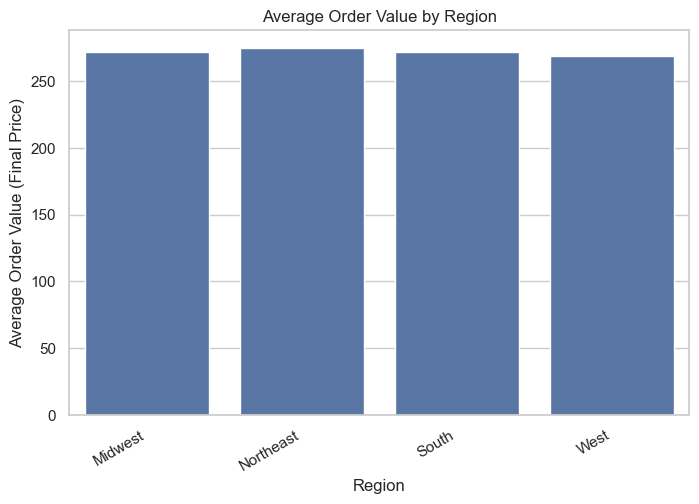

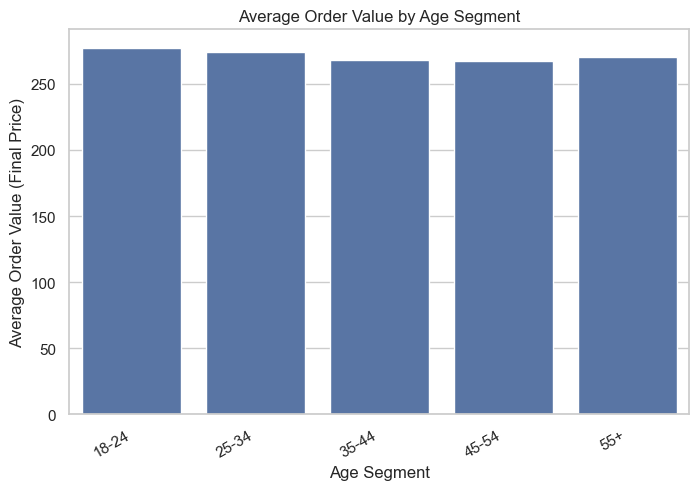

In [280]:
# Now, I am going ot find average order value with respect to both regions and ages:

aov_region = df.groupby("region")["final_price"].mean().reset_index()

aov_age = df.groupby("customer_age_group")["final_price"].mean().reset_index()

# I am making charts of Region wise and Age wise one by one:

plt.figure(figsize=(8,5))
sb.barplot(x="region", y="final_price", data=aov_region)
plt.title("Average Order Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Order Value (Final Price)")
plt.xticks(rotation=30, ha='right')
plt.show()

plt.figure(figsize=(8,5))
sb.barplot(x="customer_age_group", y="final_price", data=aov_age)
plt.title("Average Order Value by Age Segment")
plt.xlabel("Age Segment")
plt.ylabel("Average Order Value (Final Price)")
plt.xticks(rotation=30, ha='right')
plt.show()

In [281]:
# Thus, North East region have the highest average order value.

# C-3 Delivery Performance:

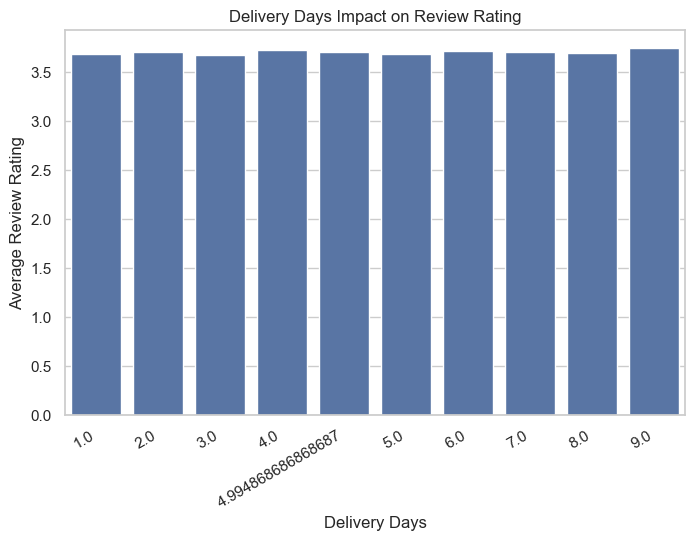

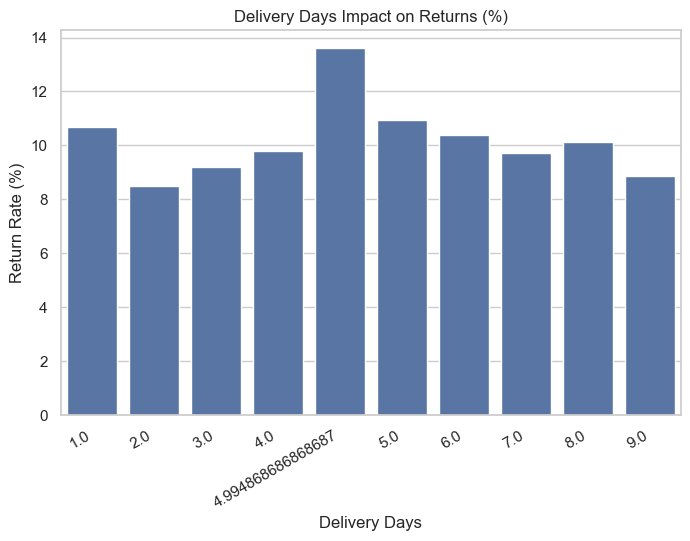

In [282]:
# Now, lets analyze does the late delivery results into the bad review and order return or not.
# Reviews per delivery days
review_per_deliverydays = df.groupby("delivery_days")["review_rating"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="delivery_days", y="review_rating", data=review_per_deliverydays)
plt.title("Delivery Days Impact on Review Rating")
plt.xlabel("Delivery Days")
plt.ylabel("Average Review Rating")
plt.xticks(rotation=30, ha="right")
plt.show()

# Returns per delivery days
returns_per_deliverydays = df.groupby("delivery_days")["is_returned"].mean().reset_index()
returns_per_deliverydays["is_returned"] = returns_per_deliverydays["is_returned"]  * 100 

plt.figure(figsize=(8, 5))
sns.barplot(x="delivery_days", y="is_returned", data=returns_per_deliverydays)
plt.title("Delivery Days Impact on Returns (%)")
plt.xlabel("Delivery Days")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=30, ha="right")
plt.show()

In [283]:
# It shows that Review Rating is not impacted on the basis of delivery days, but  delievry days have impact on return rates like
# 4-5 days deliveries causes the highest return

# C-5 Rating Signal

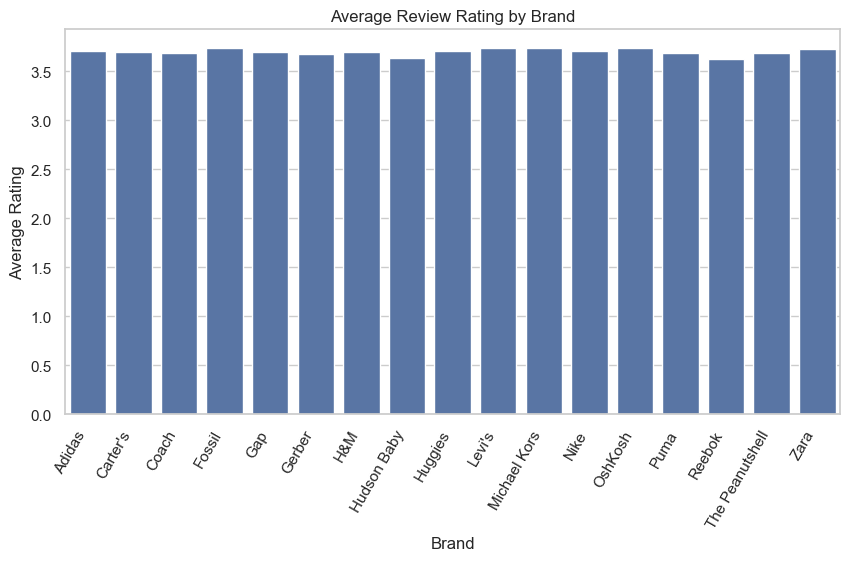

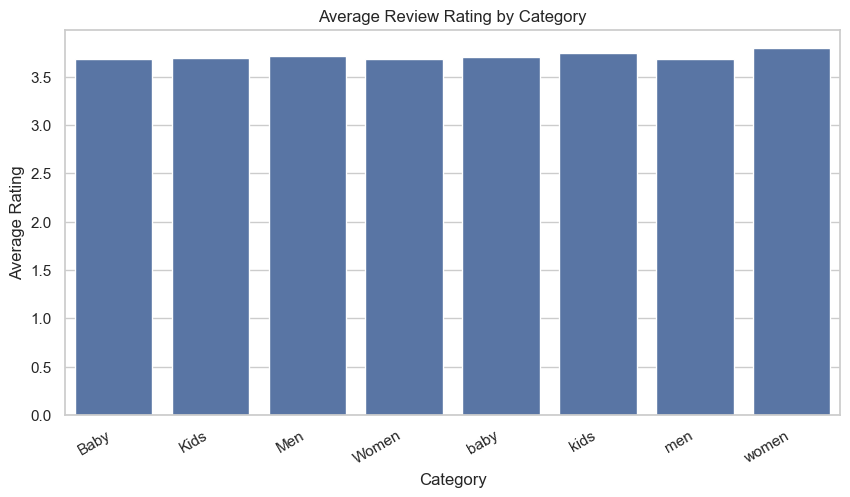

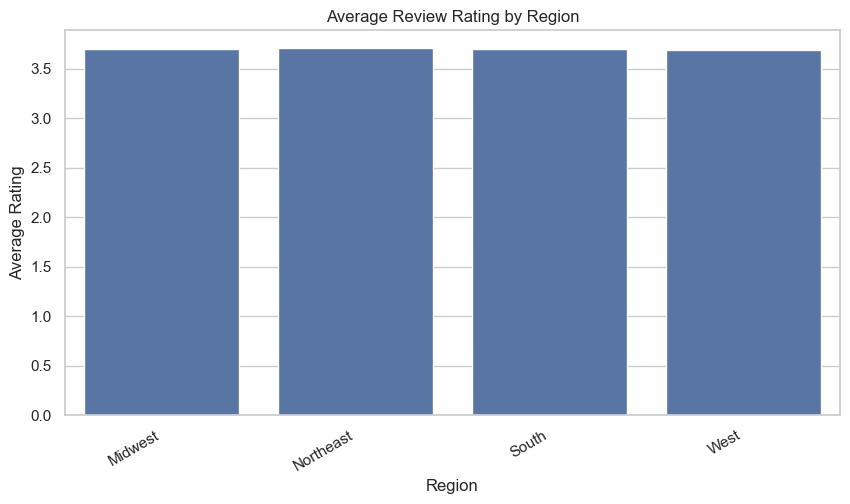

In [284]:
# Lets first find out average rating by brand wise, category wise and region wise.

# Average rating by Brand
avg_rating_brand = df.groupby("brand")["review_rating"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="brand", y="review_rating", data=avg_rating_brand)
plt.title("Average Review Rating by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.xticks(rotation=60, ha="right")
plt.show()


# Average rating by Category
avg_rating_category = df.groupby("main_category")["review_rating"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="main_category", y="review_rating", data=avg_rating_category)
plt.title("Average Review Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=30, ha="right")
plt.show()


# Average rating by Region
avg_rating_region = df.groupby("region")["review_rating"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="region", y="review_rating", data=avg_rating_region)
plt.title("Average Review Rating by Region")
plt.xlabel("Region")
plt.ylabel("Average Rating")
plt.xticks(rotation=30, ha="right")
plt.show()

In [285]:
# Rating is almost same for different regions, brand and categories. 
# Lets find out correlation of customers ratings with the order returns.

correlation = df["review_rating"].corr(df["is_returned"])
print(f"Correlation between customers ratings and order returns is:  {correlation}")

Correlation between customers ratings and order returns is:  0.007980968572747873


In [286]:
# Thus, there is no strong correlation between Order Returns and Customers Ratings

# C-7 Payment Method Insights:

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\4100193191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="payment_method", y="is_returned", data=return_by_paymentmethod, palette="Blues")


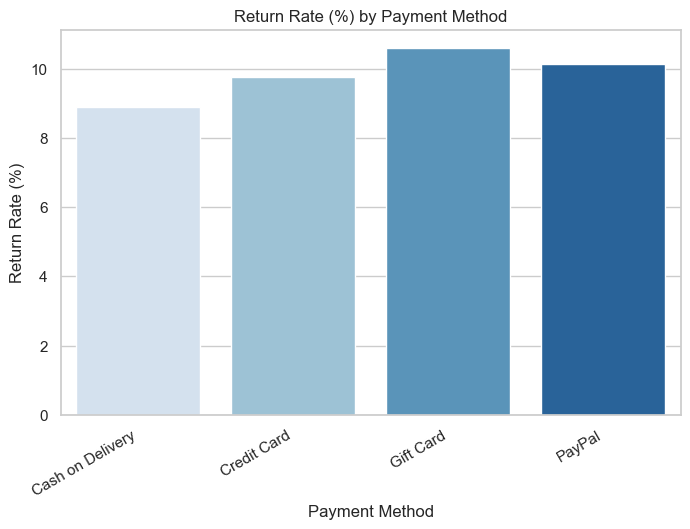

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\4100193191.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="payment_method", y="final_price", data=spent_by_paymentmethod, palette="Greens")


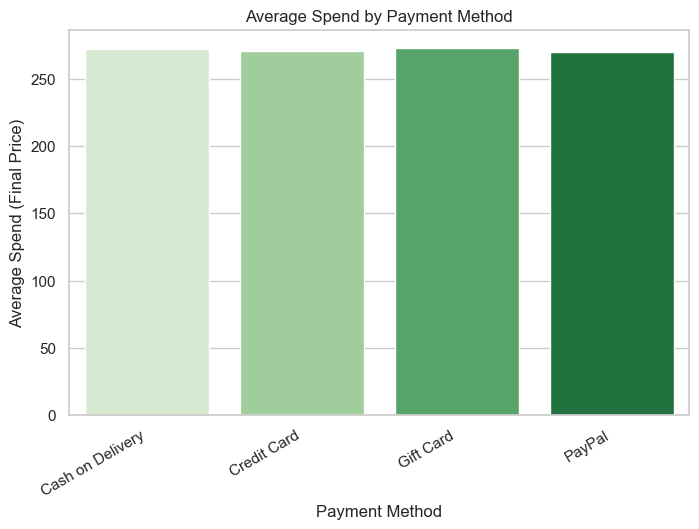

In [287]:
# Now, lets check does payment method impact return rate or money that  a person is spending.

return_by_paymentmethod = df.groupby("payment_method")["is_returned"].mean().reset_index()

return_by_paymentmethod["is_returned"]  *= 100
plt.figure(figsize=(8,5))
sb.barplot(x="payment_method", y="is_returned", data=return_by_paymentmethod, palette="Blues")
plt.title("Return Rate (%) by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=30, ha="right")
plt.show()


spent_by_paymentmethod = df.groupby("payment_method")["final_price"].mean().reset_index ()

plt.figure(figsize=(8,5))
sb.barplot(x="payment_method", y="final_price", data=spent_by_paymentmethod, palette="Greens")
plt.title("Average Spend by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Spend (Final Price)")
plt.xticks(rotation=30, ha="right")
plt.show()

In [288]:
# This, the return rate is highest when the customers are using gift cards.

# C-8 Cross Analysis

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\3586947891.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="device_type", y="is_returned", data=return_per_device, palette="Greens")


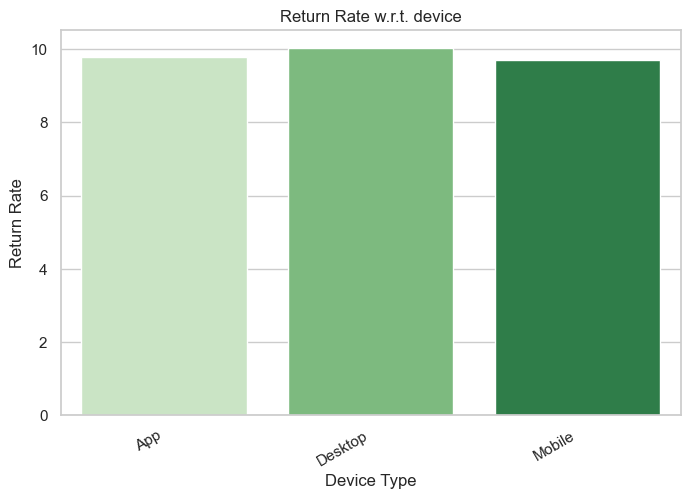

In [289]:
# Lets compare the return rate with the device.

return_per_device = df.groupby("device_type")["is_returned"].mean().reset_index()
return_per_device["is_returned"] *= 100

plt.figure(figsize=(8,5))
sb.barplot(x="device_type", y="is_returned", data=return_per_device, palette="Greens")
plt.title("Return Rate w.r.t. device")
plt.xlabel("Device Type")
plt.ylabel("Return Rate")
plt.xticks(rotation=30, ha="right")
plt.show()

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\842861667.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="delivery_days", data=delivery_perf_region, palette="viridis", errorbar=None)


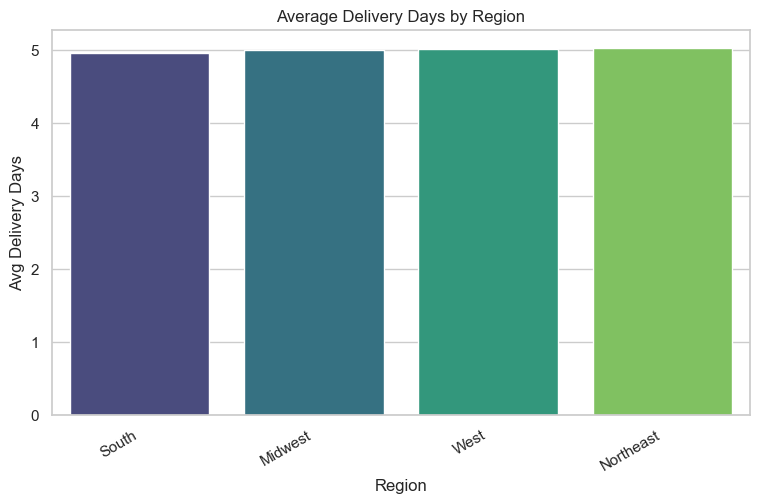

In [290]:
# Desktop Devices have the highest return rate. Now, lets compare delivery perfomance with the region

delivery_perf_region = df.groupby("region")["delivery_days"].mean().reset_index().sort_values("delivery_days")

plt.figure(figsize=(9,5))
sns.barplot(x="region", y="delivery_days", data=delivery_perf_region, palette="viridis", errorbar=None)
plt.title("Average Delivery Days by Region")
plt.xlabel("Region")
plt.ylabel("Avg Delivery Days")
plt.xticks(rotation=30, ha="right")
plt.show()

In [291]:
# This average deliery days for each region is almost 5 days.

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\426010648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_age_group", y="discount_percent", data=discount_by_age, palette="mako", errorbar=None)


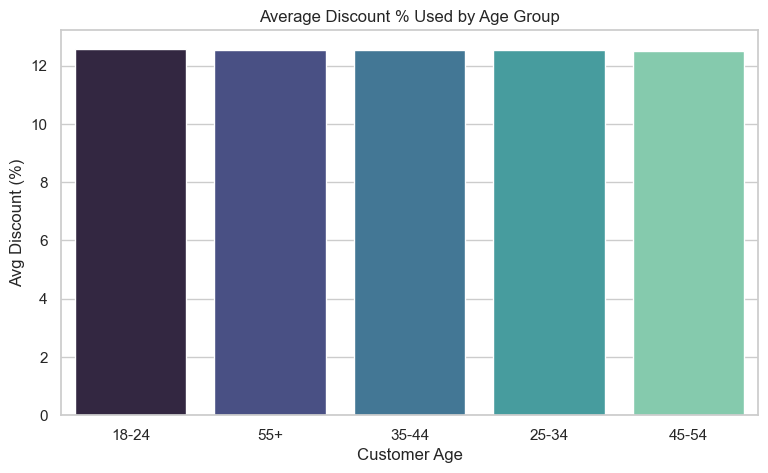

In [292]:
# Now, I am going to find out average disount rates that are being offered to each age group

discount_by_age = df.groupby("customer_age_group")["discount_percent"].mean().reset_index().sort_values("discount_percent", ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x="customer_age_group", y="discount_percent", data=discount_by_age, palette="mako", errorbar=None)
plt.title("Average Discount % Used by Age Group")
plt.xlabel("Customer Age")
plt.ylabel("Avg Discount (%)")
plt.show()

In [293]:
# Discount % is almost same for all the customers age grpups.

# D. Hypothesis Ideas

In [294]:
# Now, I am going to make different Hypothesis and check wether they are correct or not.

# Hypothesis 1: 

Higher discounts lead to higher quantity sold but also higher return rates

In [297]:
# Lets analyze correlation between the Discounts : Quantity and Discounts : Return Rates

discount_corr = df["discount_amount"].corr(df["quantity"])
print(f"Correlation between the Discount Amount and Quantity is: {discount_corr}")

return_corr = df["discount_amount"].corr(df["is_returned"])
print(f"Correlation between the Discount Amount and Return Rate is: {return_corr}")

Correlation between the Discount Amount and Quantity is: -0.0015843234377905969
Correlation between the Discount Amount and Return Rate is: -0.009932883965308857


In [ ]:
# We can also see same results on the correlation heatmap

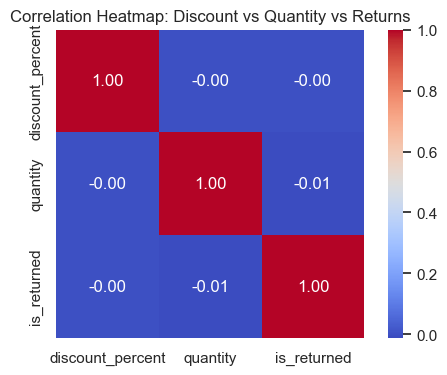

In [303]:
cols_of_interest = ["discount_percent", "quantity", "is_returned"]

corr_matrix = df[cols_of_interest].corr()

plt.figure(figsize=(6,4))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap: Discount vs Quantity vs Returns")
plt.show()

In [ ]:
# Conclusion: The Quantity sold and Return Rates does not depends on the Discount Amount, as correlation is almost 0.

# Hypothesis 2:

In [ ]:
# Consider, Longer delivery times negatively impact review ratings and increase returns.

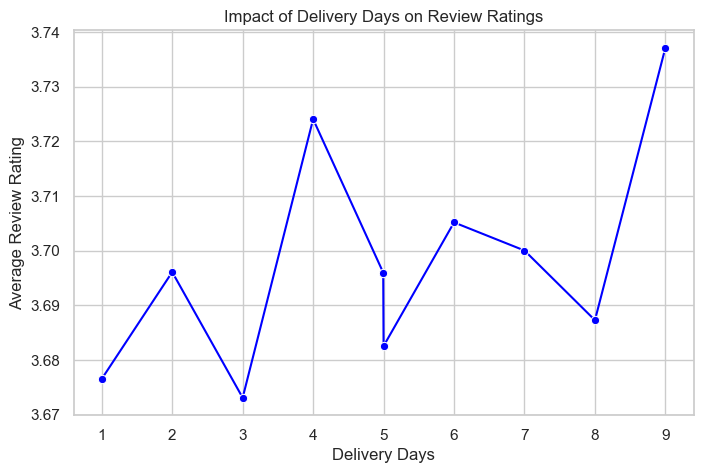

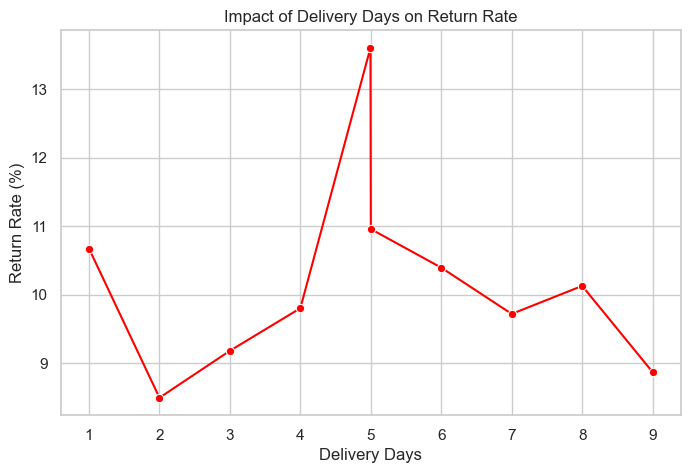

In [305]:
# Average Review Rating by Delivery Days
rating_by_delivery = df.groupby("delivery_days")["review_rating"].mean().reset_index()

plt.figure(figsize=(8,5))
sb.lineplot(x="delivery_days", y="review_rating", data=rating_by_delivery, marker="o", color="blue")
plt.title("Impact of Delivery Days on Review Ratings")
plt.xlabel("Delivery Days")
plt.ylabel("Average Review Rating")
plt.show()

# Return Rate by Delivery Days
returns_by_delivery = df.groupby("delivery_days")["is_returned"].mean().reset_index()
returns_by_delivery["is_returned"] *= 100  # Convert to percentage

plt.figure(figsize=(8,5))
sb.lineplot(x="delivery_days", y="is_returned", data=returns_by_delivery, marker="o", color="red")
plt.title("Impact of Delivery Days on Return Rate")
plt.xlabel("Delivery Days")
plt.ylabel("Return Rate (%)")
plt.show()

In [ ]:
# Result: 
# The review rating is not significanlty impacted by the delivery days increase but order return rate is highest at almost 5 days  (it increases till 
# 5 days, then start decreasing). But, we can't say that with the increase in the delivery days, the rating decreases or return rate increases linearly.

# Hypothesis 3:

Customers ordering from specific regions have systematically different return behavior.

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\3247759275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="region", y="is_returned", data=return_per_region, palette="viridis", errorbar=None)


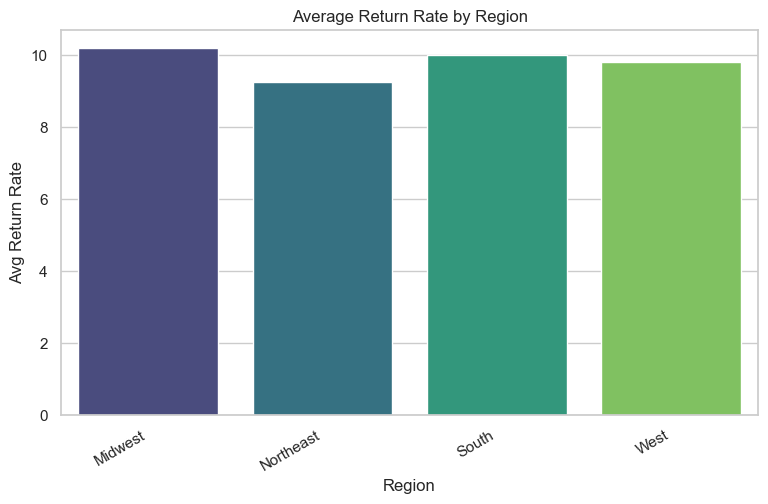

In [309]:
return_per_region = df.groupby("region")["is_returned"].mean().reset_index()
return_per_region["is_returned"] *= 100

plt.figure(figsize=(9,5))
sb.barplot(x="region", y="is_returned", data=return_per_region, palette="viridis", errorbar=None)
plt.title("Average Return Rate by Region")
plt.xlabel("Region")
plt.ylabel("Avg Return Rate")
plt.xticks(rotation=30, ha="right")
plt.show()

In [ ]:
# Result: 
# Yes, order return rates varies on the basis of Regions like Midwest Region has highest return rate and North East Region has 
# lowest return rate.

# Hypothesis 4:

Certian age group has the higher average order values.

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\1217566664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="customer_age_group", y="final_price", data=order_value_per_age, palette= "crest", errorbar = None)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

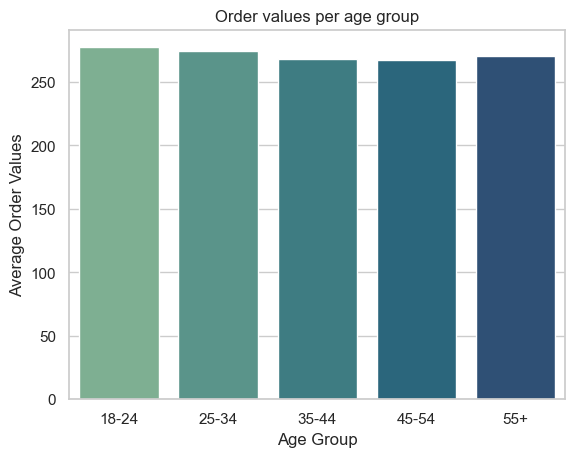

In [310]:
order_value_per_age = df.groupby("customer_age_group")["final_price"].mean().reset_index()

sb.barplot(x="customer_age_group", y="final_price", data=order_value_per_age, palette= "crest", errorbar = None)
plt.title("Order values per age group")
plt.xlabel("Age Group")
plt.ylabel("Average Order Values")
plt.xtick(rotation= 30, ha=right)
plt.show()

In [ ]:
# Result:
# Our hypothesis is true, that a specific group has the highest order value i.e. 18-24 Age Group have the highest order value.

# Hypothesis 5: 

In [ ]:
# Our next Hypothesis is: Premium brands (e.g., Nike) have lower return rates despite higher prices.

C:\Users\GEO COMPUTER S\AppData\Local\Temp\ipykernel_14208\3391495431.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


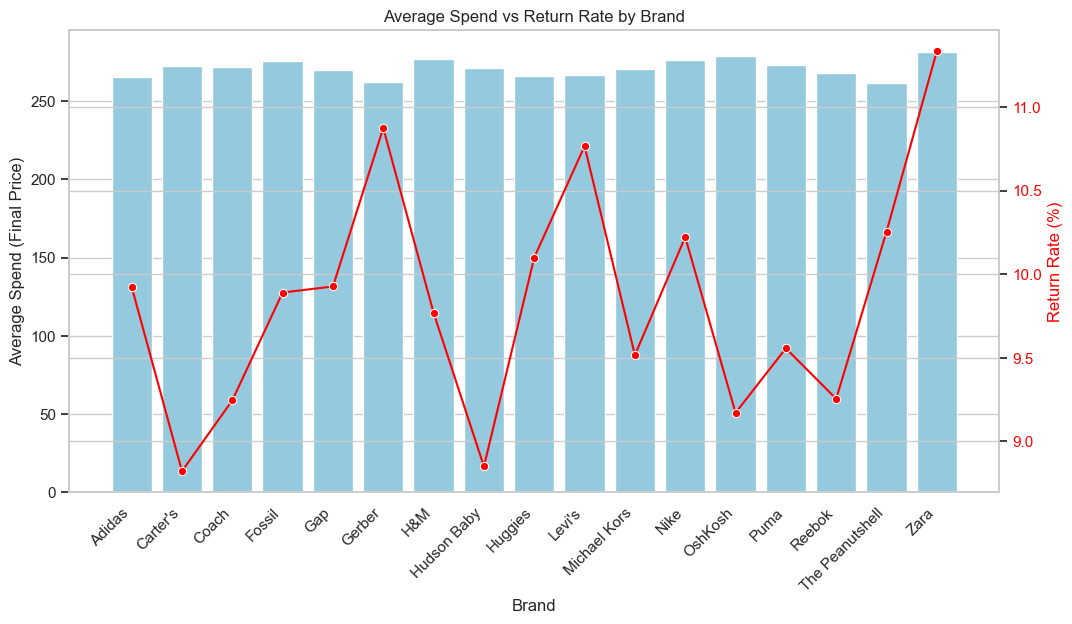

In [318]:
brand_stats = df.groupby("brand").agg(
    avg_spend=("final_price", "mean"), 
    return_rate=("is_returned", "mean")
).reset_index()

brand_stats["return_rate"] *= 100

fig, ax1 = plt.subplots(figsize=(12,6))

# Average Spend (have blue bar)
sb.barplot(x="brand", y="avg_spend", data=brand_stats, ax=ax1, color="skyblue")
ax1.set_ylabel("Average Spend (Final Price)")
ax1.set_xlabel("Brand")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Return Rate (represented by red line)
ax2 = ax1.twinx()
sb.lineplot(x="brand", y="return_rate", data=brand_stats, ax=ax2, color="red", marker="o")
ax2.set_ylabel("Return Rate (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Average Spend vs Return Rate by Brand")
plt.show()

In [ ]:
# Result: 
# The return rate of all brand is approximate same. So, it does not depends on wether prices fo things are high or low.

# E. Advanced Analyses

# E-1 Cohort Analysis:

In [ ]:
# Lets, Group customers by their first purchase month and track retention (repeat orders) over time.

In [334]:
# Lets check how many orders we have per customer?
print(df.groupby("customer_id")["order_id"].nunique().describe())

count    25000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_id, dtype: float64


In [ ]:
# Result: We can't determine customer retention as each customer ordered one time only. So, we are getting new customers in this
# data only and there are no retained customers.

# E-2 Customer Segmentation:

In [ ]:
# Now, I am going to Cluster customers based on RFM (Recency, Frequency, Monetary) and behavior (returns, rating).


🔹 First 5 rows of aggregated customer data:
    customer_id  recency  frequency  monetary  return_rate  avg_rating
0  0000A5486A60       31          1    565.98          0.0         2.0
1  000128A482A9      198          1    343.10          0.0         3.0
2  0006310A3377      132          1    203.02          0.0         5.0
3  00069A393862      170          1    541.82          0.0         3.0
4  00070A643221      353          1     86.88          0.0         4.0

🔹 Summary statistics:
            recency  frequency      monetary   return_rate    avg_rating
count  25000.000000    25000.0  25000.000000  25000.000000  25000.000000
mean     183.307080        1.0    271.491812      0.098440      3.698040
std      105.192622        0.0    196.188476      0.297915      1.095641
min        1.000000        1.0      7.530000      0.000000      1.000000
25%       92.000000        1.0    116.247500      0.000000      3.000000
50%      183.000000        1.0    219.410000      0.000000      4.00

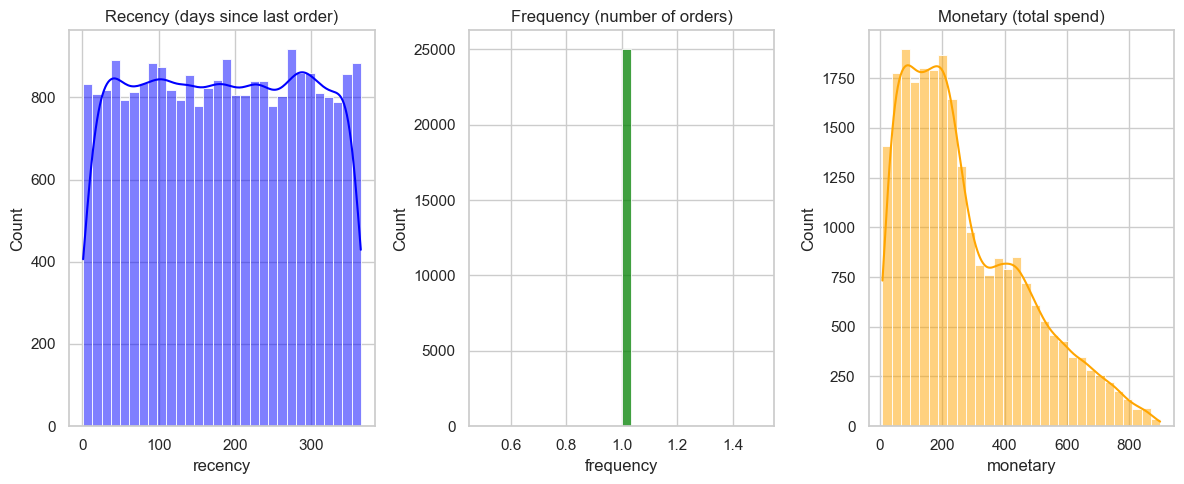


🔹 Customer counts per segment:
segment
One-time buyers    25000
Low repeat             0
Medium repeat          0
High repeat            0
Name: count, dtype: int64


In [341]:
# Lets, Define reference date (which is the latest date: in simple words we are adding 1 days in the latest order date)
today = df["order_date"].max() + pd.Timedelta(days=1)

# Step 1: Aggregate customer data
customer_stats = df.groupby("customer_id").agg(
    recency=("order_date", lambda x: (today - x.max()).days),  # it represents days since last order
    frequency=("order_id", "nunique"),                         # no of orders done by each customer
    monetary=("final_price", "sum"),                           # total spending by each customer
    return_rate=("is_returned", "mean"),                       # % of orders returned
    avg_rating=("review_rating", "mean")                       # average rating given
).reset_index()

print("\n🔹 First 5 rows of aggregated customer data:")
print(customer_stats.head())

# Step 2: Basic summaries of the customers RFM Data
print("\n🔹 Summary statistics:")
print(customer_stats.describe())

# Step 3: Doing visualizations of the customers Recency, Frequency and Monetary
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sb.histplot(customer_stats["recency"], bins=30, kde=True, color="blue")
plt.title("Recency (days since last order)")

plt.subplot(1,3,2)
sb.histplot(customer_stats["frequency"], bins=30, kde=False, color="green")
plt.title("Frequency (number of orders)")

plt.subplot(1,3,3)
sb.histplot(customer_stats["monetary"], bins=30, kde=True, color="orange")
plt.title("Monetary (total spend)")

plt.tight_layout()
plt.show()

# Step 4: Segment customers by the no of times they have bought different things
customer_stats["segment"] = pd.cut(
    customer_stats["frequency"],
    bins=[0,1,3,10,100],
    labels=["One-time buyers", "Low repeat", "Medium repeat", "High repeat"]
)

print("\n🔹 Customer counts per segment:")
print(customer_stats["segment"].value_counts())

# E-3 Price Elasticity Estimation: 

I am going to determine PED (Price of Elasticity Demand), Approximate sensitivity of quantity sold to price/discount changes.

*Price of Ealsticlity tell how sensitive the customers buying quantity is to the price/disount.
d


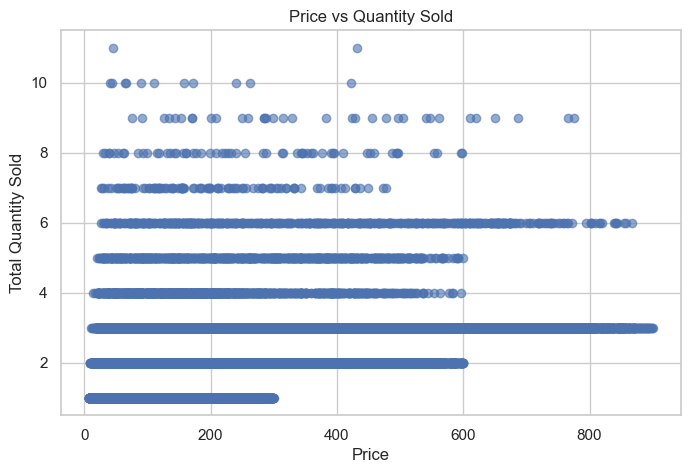

Correlation between Price and Quantity: 0.2807976571122314


In [348]:
# Step 1: Lets, Aggregate total quantity sold per price
price_qty = df.groupby("final_price")["quantity"].sum().reset_index()

# Step 2: Scatter plot of Price vs Quantity
plt.figure(figsize=(8,5))
plt.scatter(price_qty["final_price"], price_qty["quantity"], alpha=0.6)
plt.title("Price vs Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Total Quantity Sold")
plt.show()

# Step 3: Correlation (that indicates how ssensitive the quantity is to the final_price)
corr = price_qty["final_price"].corr(price_qty["quantity"])
print("Correlation between Price and Quantity:", corr)

Thus, Quantity bought is dependent on the Price as its correlation is .28

